# Inference

If we want to make a confidence interval or perform any hypothesis test, we will need to assume a distribution form for the error $\epsilon$. The most common (and reasonable) assuption is that the errors are normally distributed. For standardized data, mean is 0 and variance is $\sigma^2$.  so we have $ \epsilon \sim N(0, \sigma^2 I)$. When considering $y=X\beta+\epsilon$, then the error distribution is $ y \sim N(X\beta, \sigma^2 I)$. From this we find that linear combinations of normally distributed values are also normal

<p>&nbsp;</p>
\begin{split}
\hat \beta = (X^TX)^{-1} X^Ty  \sim N(\beta,(X^TX)^{-1} \sigma^2) 
\end{split}
<p>&nbsp;</p>

## Hypothesis Tests to Compare Models

Given a larger model $\Omega$ and a smaller subset $\omega$. Do we really need $\Omega$ if $\omega$ do the job? 
* simpler explanation is often preferable
* If the larger model has a better fit, we will prefer it

$ RSS_{$\omega$} - RSS_{$\Omega$}$ is small, then we have an indication that the smaller model is better. If we scale by one of the measures, then we have:

<p>&nbsp;</p>
\begin{split}
\frac{RSS_{\omega} - RSS_{\Omega}}{RSS_{\Omega}}
\end{split}
<p>&nbsp;</p>

The same idea is applied in ML terms
<p>&nbsp;</p>
\begin{split}
\frac{max_{\beta, \sigma, \epsilon, \Omega} L(\beta, \sigma y)}{max_{\beta, \sigma, \epsilon, \omega} L(\beta, \sigma y)}
\end{split}
<p>&nbsp;</p>

After some maniputalion, we get at:

<p>&nbsp;</p>
\begin{split}
\frac{RSS_{\omega} - RSS_{\Omega}}{RSS_{\Omega}} > a constant
\end{split}
<p>&nbsp;</p>

We still do not have the theoretical distribution of the constant. But suppose the number of parameters for $\Omega$ is $p$ and for $\omega$ is $q$, then 


<p>&nbsp;</p>
\begin{split}
F = \frac{\frac{RSS_{\omega} - RSS_{\Omega}}{p-q}}{\frac{RSS_{\Omega}}{n-p}} \sim F_{q-q, n-p}
\end{split}
<p>&nbsp;</p>

Now, we have our null hypothesis where $p$ and $q$ can be rewritten as function of d.f. of $\Omega$ $(n- p)$ and $\omega$ $(n- q)$

### Testing Examples
#### Test of all the predictors

We compare the full model ($\Omega$) that is $y=X\beta$, where $X$ is a full-rank $nxp$ matrix againt the reduced model ($\omega$) that is $y=\mu\epsilon$. $\mu$ is estimated as $\bar y$. The simple model can be read as the sum of squares corrected by the mean ($TSS$).

<p>&nbsp;</p>
$H_0: \beta_0, \beta_1, ..., \beta_n = 0$
<p>&nbsp;</p>


Large values of $F$ suggest the rejection of the null hypothesis.  If $F$ in non-significant it can indicate:
1. no association between $X$ and $Y$
2. nonlinear relation (transformation is needed)
3. Outliers
4. Insuficient data

#### Data example
* dpi is the per capita disposable income 
* ddpi is the percentage rage of change in per capita disposable income
* sr is aggregate personal saving divided by diposable income
* pop15 is the percentage of the population under 15 years
* pop75 is the percentage of the population over 75 years

In [39]:
library(faraway)
data(savings)
head(savings)
options(digits=3)

,sr,pop15,pop75,dpi,ddpi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56
Canada,8.79,31.72,2.85,2982.88,2.43


In [40]:
# First model will consider 
g = lm(sr ~ pop15 + pop75 + dpi + ddpi, savings)
summary(g)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings)

Residuals:
   Min     1Q Median     3Q    Max 
-8.242 -2.686 -0.249  2.428  9.751 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.566087   7.354516    3.88  0.00033 ***
pop15       -0.461193   0.144642   -3.19  0.00260 ** 
pop75       -1.691498   1.083599   -1.56  0.12553    
dpi         -0.000337   0.000931   -0.36  0.71917    
ddpi         0.409695   0.196197    2.09  0.04247 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.8 on 45 degrees of freedom
Multiple R-squared:  0.338,	Adjusted R-squared:  0.28 
F-statistic: 5.76 on 4 and 45 DF,  p-value: 0.00079


* Testing F manually

In [41]:
# total sum of squares
(tss = sum((savings$sr - mean(savings$sr))^2))

[1] 984

In [43]:
# residual sum square
(rss = deviance(g))

[1] 651

In [40]:
df.residual(g)

[1] 45

In [41]:
# Calculated F
fstat = ((tss - rss)/4/(rss/df.residual(g)))
round(fstat,4)

[1] 5.7557

In [42]:
# p-value
round(1- pf(fstat, 4, df.residual(g)), 5)

[1] 0.00079

#### Testing just one predictor

Can one particular predictor be dropped from the model? 

<p>&nbsp;</p>
$H_0: \beta_j = 0$
<p>&nbsp;</p>

Now, let the $RSS_{\Omega}$ be the model with all predictors and $RSS_{\omega}$ the models with all the same predictors except $i$. In this case, we can test using a  *t-statistics*

<p>&nbsp;</p>
\begin{split}
t_i= \frac{\hat \beta_i}{se(\hat \beta_i)}
\end{split}
<p>&nbsp;</p>

the significance checked using *t-distribution* with *n-p* degrees of freedom. $t_i^2$ is exactly the F-statistic.



In [43]:
# all variables, except pop15
g2 = lm(sr ~ pop75 + dpi + ddpi, data = savings)

In [44]:
(rss2 = deviance(g2))

[1] 797.7249

* F-statistic

In [45]:
# F-statistics
(fstat = (deviance(g2) - deviance(g))/ (deviance(g)/df.residual(g)))

[1] 10.16659

In [46]:
# p-value
round(1-pf(fstat,1, df.residual(g)), 4)

[1] 0.0026

* t-statistics 

In [47]:
# equivalent t-stats
round(sqrt(fstat), 4)

[1] 3.1885

In [48]:
# comparing with the estimates from the summary
(tstat = summary(g)$coef[2,3])

[1] -3.18851

In [49]:
# p-value
round(2*(1-pt(sqrt(fstat), 45)), 4)

[1] 0.0026

* A better way to compare two nested models 

In [50]:
anova(g2, g)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46,797.7249,NA,NA,NA,NA
2,45,650.7130,1,147.0119,10.16659,0.002603019


#### Testing a pair of predictors

We can construct a table to compare $X$ variables. To test join significance of two variables in a regression model, we can build model with them both and without both testing with general F-test discussed before. 

* Let's test the hypothesis that both pop75 and ddpi may be excluded from the model

In [52]:
g3 = lm(sr ~ pop15 + dpi, data = savings)
anova(g3, g)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,47,744.1237,NA,NA,NA,NA
2,45,650.7130,2,93.4107,3.229904,0.04889312


* The predictors barely passed the 5% level.

#### Testing a subspace

Suppose that $y$ is the first year grade point average for a student, $X_j$ is the score on the quantitative part of the SAT and $X_k$ is the score on the verbal part. Should we keep the two predictors separated?

<p>&nbsp;</p>
\begin{split}
y= \beta_0 + ... + \beta_jX_j + \beta_kX_k+ ...+\epsilon 
\end{split}
<p>&nbsp;</p>

Reduced to:

<p>&nbsp;</p>
\begin{split}
y= \beta_0 + ... + \beta_j(X_j + X_k)+ ...+\epsilon 
\end{split}
<p>&nbsp;</p>

For this reduction to be possible, we should test:

<p>&nbsp;</p>
\begin{split}
H_0 : \beta_j = \beta_k 
\end{split}
<p>&nbsp;</p>

Let's test if the effect of young and old people on the savings rate was the same or in other words;

<p>&nbsp;</p>
\begin{split}
H_0 : \beta_pop15 = \beta_pop75 
\end{split}
<p>&nbsp;</p>

In this case, we should test if the null model is the same as the full model

<p>&nbsp;</p>
\begin{split}
y= \beta_0 + \beta_{dep}(pop15 + pop75) + \beta_{dpi} dpi+ \beta_{ddpi} ddpi +\epsilon 
\end{split}
<p>&nbsp;</p>


In [55]:
# full model
g = lm(sr ~ ., data = savings)

# reduce model
gr = lm(sr ~I(pop15 + pop75)+dpi + ddpi, data = savings)

anova(gr, g)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46,673.6275,NA,NA,NA,NA
2,45,650.7130,1,22.91453,1.584652,0.2145833


* p-value indicates that the null model cannot be rejected here. There is no evidence that young and old people need to be treated separately in the context of this particular model

What is we want to test if a particular coefficient ca be set to a particular value.
<p>&nbsp;</p>
\begin{split}
H_0 : \beta_{ddpi} = 0.5
\end{split}
<p>&nbsp;</p>

Here the null model:

<p>&nbsp;</p>
\begin{split}
y= \beta_0 + \beta_{pop15} pop15 + \beta_{pop75} pop75 + \beta_{dpi} dpi+ 0.5 ddpi +\epsilon 
\end{split}
<p>&nbsp;</p>

* The ddpi term is now a fixed term in the equation and can be called an *offset*

In [56]:
gr = lm(sr ~ pop15 + pop75 + dpi + offset(0.5*ddpi), data = savings)
anova(gr, g)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46,653.7765,NA,NA,NA,NA
2,45,650.7130,1,3.063486,0.2118551,0.6475337


* Again, the null hypothesis is not rejected. If can test it manually with the t-test


<p>&nbsp;</p>
\begin{split}
t = \frac{\hat \beta - c}{se(\hat \beta)}
\end{split}
<p>&nbsp;</p>



In [57]:
(tstat = (0.409695 -0.5)/0.196197)

[1] -0.4602772

In [58]:
2*pt(tstat,45)

[1] 0.6475338

In [60]:
# We got the same result as before
round(tstat^2, 4)

[1] 0.2119

* The later approach is preferred in practice since we do not need to fit two models

#### Permutation Tests

* We can sample the data to test specific hypothesis of variable association of the lack of. For instance, would would be chance that the values of a variable is the result of a random distribution?  What would be the chance for we to observe higher values of F than the ones we calculated.

* We can permuted the samples (n!, 30!) of the response variable and see what proportion of the exceed the observed F-statistic.

* Let's computefor the model containing pop75 and dpi so as the p-value for F-statistics is not too small

In [62]:
g = lm(sr ~ pop75 + dpi, data = savings)
gs = summary(g)
gs


Call:
lm(formula = sr ~ pop75 + dpi, data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1571 -3.1835 -0.0844  2.2877 11.9802 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.0566189  1.2904352   5.468  1.7e-06 ***
pop75        1.3049653  0.7775328   1.678   0.0999 .  
dpi         -0.0003415  0.0010129  -0.337   0.7375    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.334 on 47 degrees of freedom
Multiple R-squared:  0.1024,	Adjusted R-squared:  0.06416 
F-statistic:  2.68 on 2 and 47 DF,  p-value: 0.07906


In [67]:
gs$fstat

value     numdf     dendf 
 2.679647  2.000000 47.000000

In [72]:
# We can now compute F-statistic for 4000 randomly selected perm
fstat = numeric(4000)
for (i in 1:4000){
    ge = lm(sample(sr) ~ pop75 + dpi, data=savings)
    fstat[i] =  summary(ge)$fstat[1]
}

In [74]:
# frequency of values above 2.67
length(fstat[fstat > 2.6796]) / 4000

[1] 0.07475

* We can perform similar approach to test predictors rather than the response

In [76]:
# t-value for the pop75 variable
round(summary(g)$coef[2,3], 4)

[1] 1.6783

In [77]:
# check what is the percentage of values that are above 1.67 in permutation  sampling
tstat = numeric(4000)
for (i in 1:4000){
    ge = lm(sr ~ sample(pop75) + dpi, data = savings)
    tstat[i] = summary(ge)$coef[2,3]     
}

In [78]:
mean(abs(tstat) > 1.6783)

[1] 0.099

#### Confidence Interval for $\beta$

Confidence Intervals (CIs) provide an alternative way of expressing the uncertainty in estimates.

For a 95% CI, any point that lies within the region represents a null hypothesis that should not be rejected at 5%.


<p>&nbsp;</p>
\begin{split}
Estimate \pm Critical\: Value \:*\: SE\: of\: Estimate
\end{split}
<p>&nbsp;</p>




<p>&nbsp;</p>
\begin{split}
\hat \beta_i \pm t_{n-p}^{\alpha/2} \hat \sigma \sqrt{(X^TX)_{ii}^{-1}}
\end{split}
<p>&nbsp;</p>


In [20]:
g = lm(sr ~ ., data = savings)
#summary(g)
# building CI
# t-value(n-p)
qt(0.975, 45)

# Calculating the interval; beta - t-value(n-p)* SE
c(-1.69 - 2.01 * 1.08, -1.69 + 2.01 * 1.08)

[1] 2.014103

[1] -3.8608  0.4808

* The interval contains zero, which indivates that the null hypothesis $H_0: \beta_{pop75} = 0$ would not be rejected at 5% level

In [12]:
confint(g)

,2.5 %,97.5 %
(Intercept),13.753330728,43.378842354
pop15,-0.752517542,-0.169868752
pop75,-3.873977955,0.490982602
dpi,-0.002212248,0.001538444
ddpi,0.014533628,0.804856227


* Let's calculate the joint 95% confidence region for $\beta_{pop15}$ and $\beta_{pop75}$

pop15 
-0.4611931

pop75 
-1.691498

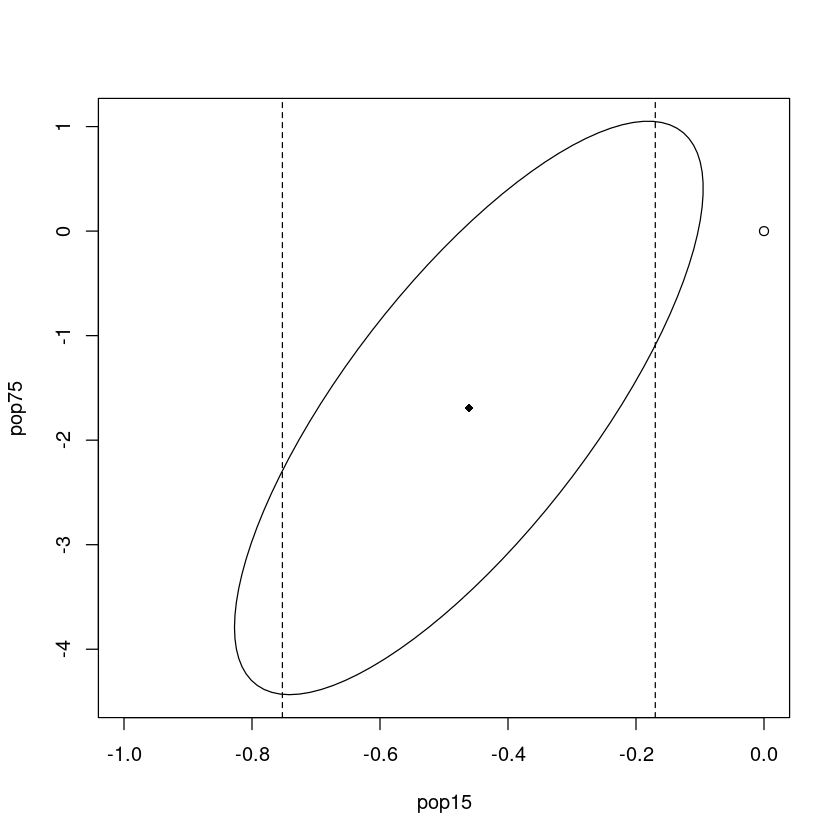

In [21]:
library(ellipse)

plot(ellipse(g,c(2,3)), type = 'l', xlim = c(-1, 0))
points(0,0)
points(coef(g)[2], coef(g)[3], pch = 18)
abline(v = confint(g)[2,], lty = 2)
abline(v = confint(g)[3,], lty = 2)

# Coordinate of the joint; as it falls outside the ellipse
coef(g)[2]
coef(g)[3]

* The ellipse is testing the hypothesis $\beta_{pop15} = \beta_{pop75} = 0$
* The results show that the estimates values fall out of the ellipse, which led us to reject the null hypothesis

In [22]:
# correlation between predictors
cor(savings$pop15, savings$pop75)

[1] -0.9084787

In [24]:
# correlation between coefficients
summary(g, corr = TRUE)$corr

,(Intercept),pop15,pop75,dpi,ddpi
(Intercept),1.0000000,-0.9841640,-0.80911114,-0.1658813,-0.18826530
pop15,-0.9841640,1.0000000,0.76535591,0.1799079,0.10246580
pop75,-0.8091111,0.7653559,1.00000000,-0.3670459,-0.05472238
dpi,-0.1658813,0.1799079,-0.36704594,1.0000000,0.25548434
ddpi,-0.1882653,0.1024658,-0.05472238,0.2554843,1.00000000


#### Confidence Interval for Predictions

* Decision makers need more than justa a point to make rational choices
* Distinguish predictions for the future mean response and predictions of future observations.

Consider  that we want to predict selling price of homes using as predictors the number of bedrooms and closeness to a major highway. Two kinds of predictions that can be made for a given $x_0$:

1. What is the selling value for a house with a characteristic $x_0$? Variance of $\epsilon$ needed
2. What would a house with characteristics $x_0$ sell for on average? Variance of $\hat \beta$ needed

The first case is a "prediction of a future value" while the second case is "prediction of the mean response". 


The variance of a future observation 

<p>&nbsp;</p>
\begin{split}
(x_0^T \hat\beta) = x_0^T(X^TX)^{-1}x_0\sigma^2
\end{split}
<p>&nbsp;</p>

is predicted to be 

<p>&nbsp;</p>
\begin{split}
x_0^T\hat\beta + \epsilon
\end{split}
<p>&nbsp;</p>

where the future $\epsilon$ is unknown. 

* To calculate the CI of a single future response, we should  use the following formula

<p>&nbsp;</p>
\begin{split}
\hat y_0 \sim t_{n-p}^{(\alpha/2}\sigma \sqrt{1+x_0^T(X^TX)^{-1}x_0}
\end{split}
<p>&nbsp;</p>

* To calculate the CI for the mean response for a given $x_0$, then

<p>&nbsp;</p>
\begin{split}
\hat y_0 \sim t_{n-p}^{(\alpha/2)}\sigma \sqrt{x_0^T(X^TX)^{-1}x_0}
\end{split}
<p>&nbsp;</p>


* Area:  0.08 km2
* Elevation: 93 m
* Nearest: 6 km
* Scruz: 12 km
* Adjacent: 0.34 km2

what is the predicted number of species under those conditions?

In [56]:
g = lm(Species ~ Area + Elevation + Nearest + Scruz + Adjacent, data = gala)

# Suppose we want to predict the response for a specific combination of predictor values 
x0 = c(1, 0.08, 93, 6.0, 12.0, 0.34)
(y0 = sum(x0*coef(g)))

[1] 33.9

* The predicted number of species would be $\sim$ 34 species.

* Now we need to decide if we want the CI on one new island or the mean response for all islands with the same predictor $x_0$

In [30]:
round(qt(0.975, 24), 4)

[1] 2.0639

* $(X^TX)^{-1}$ matrix

In [34]:
# convert x into a matrix
head(x)
x = model.matrix(g)
xtxi = solve(t(x) %*% x)

,(Intercept),Area,Elevation,Nearest,Scruz,Adjacent
Baltra,1,25.09,346,0.6,0.6,1.84
Bartolome,1,1.24,109,0.6,26.3,572.33
Caldwell,1,0.21,114,2.8,58.7,0.78
Champion,1,0.10,46,1.9,47.4,0.18
Coamano,1,0.05,77,1.9,1.9,903.82
Daphne.Major,1,0.34,119,8.0,8.0,1.84


In [37]:
# Width of the bands for mean respose CI 
round((bm = sqrt(x0 %*% xtxi %*% x0) * 2.064 * 60.98)[,1], 3)

[1] 32.89

In [46]:
# interval
round(c(y0 - bm, y0 + bm), 4)

[1]  1.03 66.81

In [49]:
# Prediction interval for the single future response
bm = sqrt( 1 + x0 %*% xtxi %*% x0) * 2.064 * 60.98
round(c(y0 - bm, y0 + bm), 3)

[1] -96.2 164.0

* The number of species cannot be a negative number neither its confidence interval. To avoid that, we can transform the response (i.e., log), or use probability model more apppropriate to the response (i.e., Poisson distribution)
* There is a more straightfoward way to calculate those intervals

In [61]:
x0 = data.frame(Area = 0.08, Elevation = 93, Nearest = 6.0, Scruz = 12, Adjacent = 0.34)
str(predict(g, x0, se = TRUE))

List of 4
 $ fit           : Named num 33.9
  ..- attr(*, "names")= chr "1"
 $ se.fit        : num 15.9
 $ df            : int 24
 $ residual.scale: num 61


In [62]:
predict(g, x0, interval = "confidence")

,fit,lwr,upr
1,33.9,1.03,66.8


In [63]:
predict(g, x0, interval = "prediction")

,fit,lwr,upr
1,33.9,-96.2,164


##### Extrapolation

Happens when we try to predict the response for values of the predictor which lie outside the range of the original data. There are two types:
1. **Quantitative extrapolation**: check if the new x0 is within the range of the original data. CIs get wider as we move away from the data. Also, it might assume non-linear behavior outside the estimate boundaries.

logical(0)

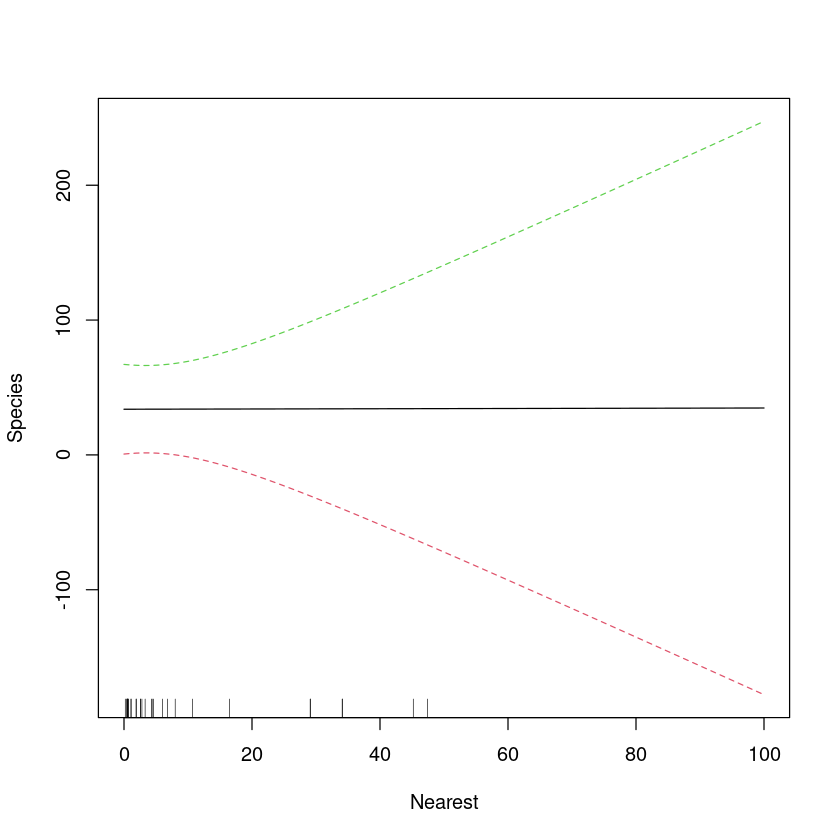

In [67]:
grid = seq(0, 100, 1)
p = predict (g, data.frame(Area = 0.08, Elevation = 93, Nearest = grid, Scruz = 12, Adjacent = 0.34), se = TRUE, interval = "confidence")

matplot(grid, p$fit, lty = c(1,2,2), type = 'l', xlab = "Nearest", ylab = "Species") > rug(gala$Nearest)

2. **Qualitative extrapolation**: Is the new x0 draom from the same population from which the original sample was drawn? We must evaluate carefully if the conclusions can be applied to the new data.

#### Designed Experiments

In a designed experiment, the user has some control over $X$. Some predictors might be controled, some might not be but can be measured with precision.Some predictors might be set as constant (i.e., temperature).

Two important design features are:
* *orthogonality*
* *randomization*

###### Orthogonality

It allow us to interpret the effect of one predictor without regard to another. Such as $[X_1 X_2]$ such as $X_1^TX_2 = 0$


<p>&nbsp;</p>
\begin{split}
y= X\beta + \epsilon = X_1 \beta_1 + X_2 \beta_2 +\epsilon 
\end{split}
<p>&nbsp;</p>


and

<p>&nbsp;</p>
\begin{align*}
\left(\begin{array}{cc} 
X^TX
\end{array}\right)
\: = \:
\left(\begin{array}{c} 
X_1^TX_1 & X_1^TX_2\\ 
X_2^TX_1 & X_2^TX_2
\end{array}\right)
\left(\begin{array}{c} 
X_1^TX_1 & 0\\ 
0 & X_2^TX_2
\end{array}\right)
\end{align*}
<p>&nbsp;</p>

which means that $\hat \beta_1$ is:


<p>&nbsp;</p>
\begin{split}
\hat \beta_1 = (X_1^T X_1)^{-1}X_1^Ty
\end{split}
<p>&nbsp;</p>

and $\hat \beta_2$ is:

<p>&nbsp;</p>
\begin{split}
\hat \beta_2 = (X_2^T X_2)^{-1}X_2^Ty
\end{split}
<p>&nbsp;</p>

Notice that $\hat \beta_1$ will be estimate the same regardless if $X_2$ is in the model or not, and vice versa. Not all estimations will be same regardless of $X_2$, such as:

<p>&nbsp;</p>
\begin{split}
\frac{RSS}{df} = \hat \sigma^2
\end{split}
<p>&nbsp;</p>

Orthogonality is a desirable property, but will only occur when $X$ is chosen by the experimenter. It is a feature of a good design. 

##### Central composite design

Determine the  effect of column temperature, gas/liquid ratio, and packing heigh in reducing unpleasant odor of a chemical product

In [68]:
data(odor)
head(odor)

,odor,temp,gas,pack
,<dbl>,<dbl>,<dbl>,<dbl>
1,66,-1,-1,0
2,39,1,-1,0
3,43,-1,1,0
4,49,1,1,0
5,58,-1,0,-1
6,17,1,0,-1


In [69]:
# getting the predictors and adding the intercept
x = as.matrix(cbind(1, odor[,-1]))

* $X^TX$

In [72]:
# the diagonal matrix
t(x) %*% x

,1,temp,gas,pack
1,15,0,0,0
temp,0,8,0,0
gas,0,0,8,0
pack,0,0,0,8


In [73]:
g =  lm(odor ~ temp + gas + pack, data = odor)
summary(g, cor=TRUE)


Call:
lm(formula = odor ~ temp + gas + pack, data = odor)

Residuals:
   Min     1Q Median     3Q    Max 
-50.20 -17.14   1.17  20.30  62.93 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)     15.2        9.3    1.63     0.13
temp           -12.1       12.7   -0.95     0.36
gas            -17.0       12.7   -1.34     0.21
pack           -21.4       12.7   -1.68     0.12

Residual standard error: 36 on 11 degrees of freedom
Multiple R-squared:  0.334,	Adjusted R-squared:  0.152 
F-statistic: 1.84 on 3 and 11 DF,  p-value: 0.199

Correlation of Coefficients:
     (Intercept) temp gas 
temp 0.00                 
gas  0.00        0.00     
pack 0.00        0.00 0.00


* All the pairwise coefficients are zero. SEs are all the same due to the balanced design 

In [75]:
# Dropping one variable
g = lm(odor ~ gas + pack, data = odor)
summary(g, cor = TRUE)


Call:
lm(formula = odor ~ gas + pack, data = odor)

Residuals:
   Min     1Q Median     3Q    Max 
-50.20 -26.70   1.17  26.80  50.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    15.20       9.26    1.64     0.13
gas           -17.00      12.68   -1.34     0.20
pack          -21.37      12.68   -1.69     0.12

Residual standard error: 35.9 on 12 degrees of freedom
Multiple R-squared:  0.279,	Adjusted R-squared:  0.159 
F-statistic: 2.32 on 2 and 12 DF,  p-value: 0.141

Correlation of Coefficients:
     (Intercept) gas 
gas  0.00            
pack 0.00        0.00


* residual SE changed slightly, causing changes in t-values, and p-values
* It does not have a big impact though

##### Comparing it to non-controled data (observational)

In [79]:
g = lm(sr ~ pop15 + pop75 + dpi + ddpi, data = savings)
summary(g, cor = TRUE)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings)

Residuals:
   Min     1Q Median     3Q    Max 
-8.242 -2.686 -0.249  2.428  9.751 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.566087   7.354516    3.88  0.00033 ***
pop15       -0.461193   0.144642   -3.19  0.00260 ** 
pop75       -1.691498   1.083599   -1.56  0.12553    
dpi         -0.000337   0.000931   -0.36  0.71917    
ddpi         0.409695   0.196197    2.09  0.04247 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.8 on 45 degrees of freedom
Multiple R-squared:  0.338,	Adjusted R-squared:  0.28 
F-statistic: 5.76 on 4 and 45 DF,  p-value: 0.00079

Correlation of Coefficients:
      (Intercept) pop15 pop75 dpi  
pop15 -0.98                        
pop75 -0.81        0.77            
dpi   -0.17        0.18 -0.37      
ddpi  -0.19        0.10 -0.05  0.26


In [78]:
# now dropping one variable
g = update(g, . ~ . - pop15)
summary(g)


Call:
lm(formula = sr ~ pop75 + dpi + ddpi, data = savings)

Residuals:
   Min     1Q Median     3Q    Max 
-8.058 -3.214  0.169  2.426 10.076 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.487494   1.427662    3.84  0.00037 ***
pop75       0.952857   0.763746    1.25  0.21849    
dpi         0.000197   0.001003    0.20  0.84499    
ddpi        0.473795   0.213727    2.22  0.03162 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.16 on 46 degrees of freedom
Multiple R-squared:  0.189,	Adjusted R-squared:  0.136 
F-statistic: 3.57 on 3 and 46 DF,  p-value: 0.0209


#### Observational Data
##### Sample survey 

* a Good survey design can allow stronger and wider conclusions, but the data will still be observational

* Interpreting models built on observational data is problematic. Many opportunities for errors and unqualifiable conclusions. 

Suppose we collect data to fit the model 

<p>&nbsp;</p>
\begin{split}
\hat y = \hat\beta_0 + \hat\beta_1x_1 + ... + \hat\beta_p x_p 
\end{split}
<p>&nbsp;</p>

what does $\hat\beta_1$ mean?
* A unit in change in $x_1$ will produce a change of $\hat\beta_1$ in response.
    - Some $Z$ might be behind the apparent association between $x_1$ and $y$, and once $Z$ accounted, no relationship will be seem.
    - Collinearity
*  $\hat\beta_1$ is the effect of $x_1$ when all the other (specified) predictors are held constant
    - in practice, individual variables cannot be changed without changing other too.
   
#### Let's fit four different models considering the effect of pop75


In [80]:
g = lm(sr ~ pop15 + pop75 + dpi + ddpi , data = savings)
summary(g)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings)

Residuals:
   Min     1Q Median     3Q    Max 
-8.242 -2.686 -0.249  2.428  9.751 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.566087   7.354516    3.88  0.00033 ***
pop15       -0.461193   0.144642   -3.19  0.00260 ** 
pop75       -1.691498   1.083599   -1.56  0.12553    
dpi         -0.000337   0.000931   -0.36  0.71917    
ddpi         0.409695   0.196197    2.09  0.04247 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.8 on 45 degrees of freedom
Multiple R-squared:  0.338,	Adjusted R-squared:  0.28 
F-statistic: 5.76 on 4 and 45 DF,  p-value: 0.00079


* Surprisingly pop75 is not significant, but is negativelly correlated with pop15. The two variables measure "how" old a given population is. When two variables measuring the same thing, it is not unusual that one or both appear insignificant  

In [82]:
g2 = lm(sr ~ pop75 + dpi + ddpi, data = savings)
summary(g2)


Call:
lm(formula = sr ~ pop75 + dpi + ddpi, data = savings)

Residuals:
   Min     1Q Median     3Q    Max 
-8.058 -3.214  0.169  2.426 10.076 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.487494   1.427662    3.84  0.00037 ***
pop75       0.952857   0.763746    1.25  0.21849    
dpi         0.000197   0.001003    0.20  0.84499    
ddpi        0.473795   0.213727    2.22  0.03162 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.16 on 46 degrees of freedom
Multiple R-squared:  0.189,	Adjusted R-squared:  0.136 
F-statistic: 3.57 on 3 and 46 DF,  p-value: 0.0209


* pop75 and dpi are still non-significant, even though we would expect that those variables would be associated with wealthier nations

In [83]:
g3 = lm(sr ~ pop75 + ddpi, data = savings)
summary(g3)


Call:
lm(formula = sr ~ pop75 + ddpi, data = savings)

Residuals:
   Min     1Q Median     3Q    Max 
-8.022 -3.295  0.089  2.457 10.107 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.470      1.410    3.88  0.00033 ***
pop75          1.073      0.456    2.35  0.02299 *  
ddpi           0.464      0.205    2.26  0.02856 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.12 on 47 degrees of freedom
Multiple R-squared:  0.188,	Adjusted R-squared:  0.154 
F-statistic: 5.45 on 2 and 47 DF,  p-value: 0.00742


* now pop75 is significant with positive association with the response variable

In [84]:
g4 = lm(sr ~ pop75, data = savings)
summary(g4)


Call:
lm(formula = sr ~ pop75, data = savings)

Residuals:
   Min     1Q Median     3Q    Max 
-9.266 -3.229  0.054  2.334 11.850 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.152      1.248    5.73  6.4e-07 ***
pop75          1.099      0.475    2.31    0.025 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.29 on 48 degrees of freedom
Multiple R-squared:   0.1,	Adjusted R-squared:  0.0814 
F-statistic: 5.34 on 1 and 48 DF,  p-value: 0.0251


* The significance and the direction of the effect of pop75 changes according to if other variables were included in the model
* We certainly should not make any strong causal conclusions

In order to make stronger conclusions about causality:

1. Try to include all relevant variables
2. Use nonstatistical knowledge of the physical nature of the relationship
3. Vary the models and see whether a similar effect is observed
4. Multiple studies under different conditions

The prediction, however, tend to be more stable than parameter estimations.


In [87]:
x0 = data.frame(pop15 = 32, pop75 = 3, dpi = 700, ddpi = 3)
round(predict(g, x0), 3)
round(predict(g2, x0), 3)
round(predict(g3, x0), 3)
round(predict(g4, x0), 3)

1 
9.73

1 
9.91

1 
10.1

1 
10.4

### Practical Difficulties
#### Nonrandom Samples

* Population vs sample. Statistical inferences depends on the sample being random. 
* Sometimes, the sample is the complete populations. In this case, inference is not required given that population and sample are one and the same

#### Choice and Range of Predictors

* when important predictors are not observed, the predictions may be poor or we may misinterpret the relationship between the predictors and the reponse
* Range and condition under which data is collected my limit effective predictions

#### Model Misspecification

* Make sure about the structural and random part of the model. We may assum the error $\epsilon \sim N(0, \sigma^2I)$, when that is not the case. The structural part of linear $Ey = X\beta$ when it is non-linear.

Models come from:
1. Physical theory
2. Experience with past data
3. Data exploration

#### Practical and Statistical Significance

* Statistical significance is not equivalent to practical significance. The larger the sample, the smaller the p-value will be
* With larger dataset, it is very easy to get statistical significance, but the effect might be unimportant 
* CIs are best way to assess the size of an effect. They are important even than we do not reject $H_0$